In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import tensorflow as tf

In [109]:
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D,Bidirectional,Flatten
from tensorflow.keras.layers import LSTM, Embedding,TimeDistributed
from tensorflow.keras.models import Model,Sequential

In [110]:
contractions_dict={
    "ain't": "are not","aren't": "are not","can't": "can not", "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not","hadn't": "had not",
    "hadn't've": "had not have",  "hasn't": "has not",
    "haven't": "have not",  "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how're": "how are",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",  "oughtn't": "ought not",
    "oughtn't've": "ought not have", "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have", "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will", "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have","shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have", "so's": "so is",
    "that'd": "that would", "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you shall have",
    "you're": "you are",
    "you've": "you have"
}

In [111]:
x=["HI we'll","bye y'all love you you've"]
for i in range(len(x)):
    x[i]=expand_contractions(str(x[i]))
    

In [112]:
x


['HI we will', 'bye you all love you you have']

In [113]:
x="Hi hello how are you"
print(len(x.split()))

5


In [114]:
url="https://raw.githubusercontent.com/Sooryak12/FakeReviewDetectionLSTM/master/selected.txt"

In [115]:
df=pd.read_csv(url,delimiter="\t")
df.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [116]:
df.isnull().sum()

DOC_ID               0
LABEL                0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64

In [117]:
df["PRODUCT_CATEGORY"].value_counts()

Watches                   700
Luggage                   700
Outdoors                  700
Home Improvement          700
Kitchen                   700
Electronics               700
Baby                      700
Video Games               700
Books                     700
Home Entertainment        700
Automotive                700
Video DVD                 700
Tools                     700
Office Products           700
Camera                    700
Apparel                   700
Shoes                     700
Musical Instruments       700
Toys                      700
Home                      700
PC                        700
Beauty                    700
Sports                    700
Pet Products              700
Jewelry                   700
Furniture                 700
Health & Personal Care    700
Wireless                  700
Grocery                   700
Lawn and Garden           700
Name: PRODUCT_CATEGORY, dtype: int64

In [118]:
df.columns

Index(['DOC_ID', 'LABEL', 'RATING', 'VERIFIED_PURCHASE', 'PRODUCT_CATEGORY',
       'PRODUCT_ID', 'PRODUCT_TITLE', 'REVIEW_TITLE', 'REVIEW_TEXT'],
      dtype='object')

In [119]:
df.iloc[5]

DOC_ID                                                               6
LABEL                                                       __label1__
RATING                                                               3
VERIFIED_PURCHASE                                                    N
PRODUCT_CATEGORY                                Health & Personal Care
PRODUCT_ID                                                  B00686HNUK
PRODUCT_TITLE        Tobacco Pipe Stand - Fold-away Portable - Ligh...
REVIEW_TITLE                                                  not sure
REVIEW_TEXT          I'm not sure what this is supposed to be but I...
Name: 5, dtype: object

In [120]:
df["LABEL"]=df["LABEL"].replace(['__label2__','__label1__'],['0','1'])

In [122]:
dfs=df[["REVIEW_TEXT","LABEL","PRODUCT_CATEGORY"]]
dfs = dfs.rename(columns={'REVIEW_TEXT': 'reviews',"LABEL":"label","PRODUCT_CATEGORY":"cat"})

In [123]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  21000 non-null  object
 1   label    21000 non-null  object
 2   cat      21000 non-null  object
dtypes: object(3)
memory usage: 492.3+ KB


In [124]:
dfs["label"].value_counts()

1    10500
0    10500
Name: label, dtype: int64

In [125]:
dfs["label"]=dfs["label"].astype(np.float32)

In [126]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence
import re

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict):
     def replace(match):
        return contractions_dict[match.group(0)]
     return contractions_re.sub(replace, s)

In [127]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [128]:
for i in range(  len(dfs["reviews"])):
    dfs["reviews"][i]=expand_contractions(str(dfs["reviews"][i]))

C:\Users\soory\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [129]:
dfs["reviews"]=dfs["reviews"].apply(preprocess_text)

In [130]:
dfs["reviews"]=dfs["reviews"].apply(remove_tags)

In [131]:
dfs["reviews"]

0        When least you think so this product will save...
1        Lithium batteries are something new introduced...
2        I purchased this swing for my baby She is mont...
3        I was looking for an inexpensive desk calcolat...
4        I only use it twice week and the results are g...
                               ...                        
20995    I bought these for work have high arches so us...
20996    Crocs are one of only two brands of shoes that...
20997    I love moccasins This fit like it was custom m...
20998    I wish these were little more durable got it c...
20999    I have been looking for replacement for my bel...
Name: reviews, Length: 21000, dtype: object

In [132]:
from nlppreprocess import NLP
nlp=NLP
obj=NLP(remove_stopwords=True,remove_numbers=True)
dfs["reviews"]=dfs["reviews"].apply(obj.process)

In [133]:
dfs["len_review"]=dfs["reviews"].apply(lambda x :len(x.split()))

In [134]:
max(dfs["len_review"])

2056

In [135]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviews     21000 non-null  object 
 1   label       21000 non-null  float32
 2   cat         21000 non-null  object 
 3   len_review  21000 non-null  int64  
dtypes: float32(1), int64(1), object(2)
memory usage: 574.3+ KB


In [136]:
def category(x):
    if 0<x<11:
        return 5
    elif 10<x<21:
        return 15
    elif 20<x<31:
        return 25
    elif 30<x<41:
        return 35
    elif 40<x<50:
        return 45
    elif 50<x<61:
        return 55
    elif 60<x<101:
        return 80
    elif 100<x<301:
        return 150
    elif 300<x<601:
        return 450
    elif 600<x<1001:
        return 800
    elif 1000<x<1501:
        return 1250
    elif 1500<x<2001:
        return 1750
    elif 2000<x<2600:
        return 2300
    

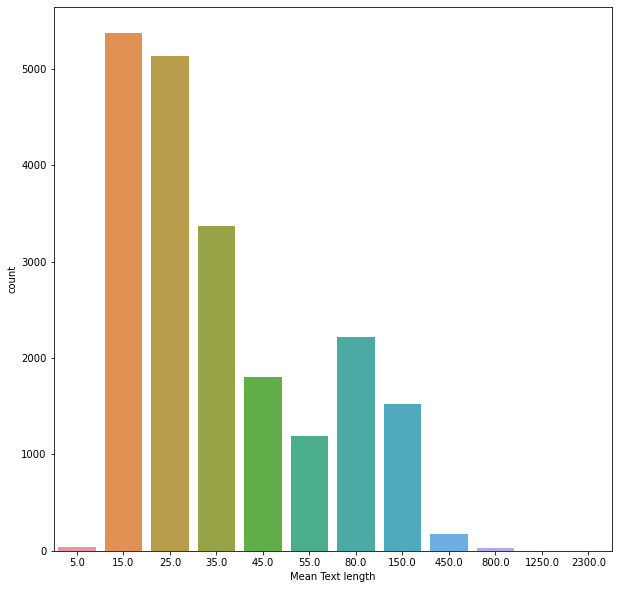

In [137]:
dfs["textcat"]=dfs["len_review"].apply(category)
plt.figure(figsize=(10,10))
ax=sns.countplot(dfs["textcat"])
ax.set(xlabel="Mean Text length")
plt.show()

In [138]:
np.median(dfs["len_review"])

30.0

In [141]:
c=0
for i in dfs["len_review"]:
    if 100<i:
      c+=1
print(c)

1729


In [142]:
1515/21000

0.07214285714285715

In [143]:
dfse=dfs[dfs["len_review"]<105]

In [144]:
dfse.reset_index(drop=True,inplace=True)

In [145]:
dfse["reviews"]=dfse["reviews"].str.lower()

C:\Users\soory\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
dfse["reviews"][789]

'love great fit my phone and comfy handleit not seem slide downgreat product'

In [147]:
dfse["reviews"][789]

'love great fit my phone and comfy handleit not seem slide downgreat product'

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
embeddings_index = dict()
f = open('glove.6B.100d.txt',encoding='utf8')

In [150]:
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [151]:
df_train,df_test,Ytrain,Ytest = train_test_split(dfse["reviews"],dfse["label"], test_size=0.2, random_state=43)

In [152]:
MAX_VOCAB_SIZE=30000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE,oov_token="<OOV>")
tokenizer.fit_on_texts(df_train)

In [154]:
word2idx=tokenizer.word_index
len(word2idx)

22984

In [155]:
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [156]:
data_train = pad_sequences(sequences_train,maxlen=104)
print('Shape of data train tensor:',data_train.shape)
T = data_train.shape[1]

Shape of data train tensor: (15498, 104)


In [157]:
data_test = pad_sequences(sequences_test,maxlen=T)
print('Shape of data test tensor:',data_test.shape)

Shape of data test tensor: (3875, 104)


In [158]:
embedding_matrix = np.zeros((MAX_VOCAB_SIZE, 100))
for word, index in tokenizer.word_index.items():
    if index > MAX_VOCAB_SIZE - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [159]:
max_len=104

In [160]:
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D

In [161]:
model_glove = Sequential()
model_glove.add(Embedding(MAX_VOCAB_SIZE, 100, input_length=max_len, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(LSTM(100))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
r=model_glove.fit(data_train, np.array(Ytrain), validation_data=(data_test,np.array(Ytest)), epochs = 20)

Train on 15498 samples, validate on 3875 samples
Epoch 1/20
15498/15498 [==============================] - 26s 2ms/sample - loss: 0.6910 - accuracy: 0.4903 - val_loss: 0.6921 - val_accuracy: 0.4779
Epoch 2/20
15498/15498 [==============================] - 24s 2ms/sample - loss: 0.6772 - accuracy: 0.5511 - val_loss: 0.6769 - val_accuracy: 0.5311
Epoch 3/20
15498/15498 [==============================] - 23s 1ms/sample - loss: 0.6662 - accuracy: 0.5927 - val_loss: 0.6763 - val_accuracy: 0.6178
Epoch 4/20
15498/15498 [==============================] - 23s 2ms/sample - loss: 0.6619 - accuracy: 0.6054 - val_loss: 0.6673 - val_accuracy: 0.6103
Epoch 5/20
15498/15498 [==============================] - 23s 1ms/sample - loss: 0.6564 - accuracy: 0.6171 - val_loss: 0.6677 - val_accuracy: 0.6199
Epoch 6/20
15498/15498 [==============================] - 23s 1ms/sample - loss: 0.6486 - accuracy: 0.6416 - val_loss: 0.6623 - val_accuracy: 0.6132
Epoch 7/20
15498/15498 [==============================] -

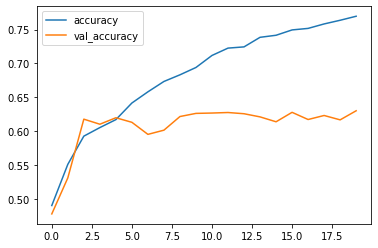

In [162]:
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [164]:
model_glove = Sequential()
model_glove.add(Embedding(MAX_VOCAB_SIZE, 100, input_length=max_len, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(Bidirectional(LSTM(100)))
model_glove.add(Flatten())
model_glove.add(Dense(64, activation='sigmoid'))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
r=model_glove.fit(data_train, np.array(Ytrain), validation_data=(data_test,Ytest), epochs = 20)

Train on 15498 samples, validate on 3875 samples
Epoch 1/20
15498/15498 [==============================] - 70s 5ms/sample - loss: 0.6877 - accuracy: 0.5022 - val_loss: 0.6817 - val_accuracy: 0.5306
Epoch 2/20
15498/15498 [==============================] - 59s 4ms/sample - loss: 0.6695 - accuracy: 0.5816 - val_loss: 0.6643 - val_accuracy: 0.5977
Epoch 3/20
15498/15498 [==============================] - 51s 3ms/sample - loss: 0.6465 - accuracy: 0.6463 - val_loss: 0.6595 - val_accuracy: 0.5969
Epoch 4/20
15498/15498 [==============================] - 49s 3ms/sample - loss: 0.6266 - accuracy: 0.7003 - val_loss: 0.6556 - val_accuracy: 0.6209
Epoch 5/20
15498/15498 [==============================] - 58s 4ms/sample - loss: 0.6060 - accuracy: 0.7518 - val_loss: 0.6622 - val_accuracy: 0.6372
Epoch 6/20
15498/15498 [==============================] - 61s 4ms/sample - loss: 0.5959 - accuracy: 0.7746 - val_loss: 0.6674 - val_accuracy: 0.6369
Epoch 7/20
15498/15498 [==============================] -

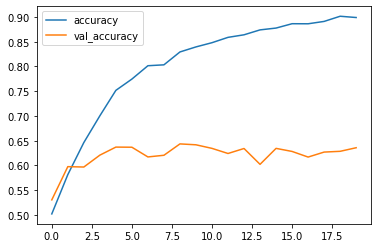

In [166]:
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")
plt.legend()